In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib as im

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("data/train_test/train(in scope).csv")

In [4]:
data.head()

,Unnamed: 0,CASE,EVENT,SIMPLIFIED EVENT,EVENT TYPE,SYS DATE,CREATION DATE,POSTING DATE,DOCUMENT DATE,Company Code,...,Vendor Industry,Company Code Country,EVENT AND USER,EVENT AND DOCTYPE,INVOICES_Q,INVOICES_A,GOODS RECIEVED_Q,GOODS RECIEVED_A,POS_Q,POS_A
0,0,2000475085-10,Purchase order,Purchase order,Purchasing document,2014-10-01 01:17:29,2014-10-01 00:00:00,NaN,NaN,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-3140,-196.66,-6280.0,-393.32
1,1,2000475085-10,Purchase order item updated,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,NaN,NaN,NaN,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2000475085-10,Purchase order item updated - amount,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,NaN,NaN,NaN,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2000475085-10,Purchase order item updated - quantity,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,NaN,NaN,NaN,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2000475085-10,Goods Return (Goods Receipt for Purchase Order),Goods Return,Delivery (in scope),2014-10-10 03:15:16,2014-10-10 03:15:16,2014-10-10 00:00:00,NaN,3000.0,...,NaN,NaN,NaN,Goods Return (Goods Receipt for Purchase Order...,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
features = ["CASE", "SIMPLIFIED EVENT","EVENT TYPE", "Document Type", "Document Category Description",
            "User ID", "Purchase Group"]

In [6]:
for column in features:
    n = data[np.logical_not(data[column].isnull())].shape[0]
    m = data.shape[0]
    unique_values_num = np.unique(data[np.logical_not(data[column].isnull())][column]).size
    if n/m > 0.6:
        print(column, n/m, unique_values_num)

CASE 1.0 1240
SIMPLIFIED EVENT 1.0 27
EVENT TYPE 1.0 10
Document Type 0.9984451354953354 13
Document Category Description 1.0 10
User ID 1.0 23
Purchase Group 1.0 14


In [7]:
data["Document Type"].fillna("Not set", inplace=True)

In [8]:
from collections import Counter

for feature in features:
    c = Counter(data[feature])
    items = list(c.items())
    items.sort(key=lambda x: x[1])
    items = np.array(items)
    flag = "Not set" in items[:, 0] or "Unknown" in items[:, 0]
    print(feature, flag)
    print(np.array(items))

CASE False
[['2000489599-20' '3']
 ['2000498319-1' '4']
 ['2000498313-1' '4']
 ...
 ['2000490512-1' '43']
 ['2000486089-30' '47']
 ['2000486089-10' '51']]
SIMPLIFIED EVENT False
[[' cancel)' '1']
 ['Permanently blocked' '2']
 ['Credit Note header updated' '4']
 ['Clearing (Credit memo)' '6']
 ['Consumption (Subcontracting)' '7']
 ['Credit Note' '10']
 ['Credit Note item updated' '11']
 ['Purchase order header updated' '18']
 ['Invoice Reciept (Logistics invoice) blocked' '26']
 ['Invoice Reciept (Logistics invoice) released' '75']
 ['RELEASED' '79']
 ['Goods Issue for Stock Transfer' '116']
 ['BLOCKED' '130']
 ['Delivery (Stock Transfer)' '130']
 ['Blocked' '132']
 ['Goods Return' '212']
 ['RELEASED (5% delta possible)' '356']
 ['RELEASED (10% delta possible)' '404']
 ['Invoice Reciept header updated' '567']
 ['Approved' '852']
 ['Invoice Reciept item updated' '1024']
 ['Purchase order item updated' '1034']
 ['Purchase order' '1240']
 ['Clearing (Invoice)' '1246']
 ['Invoice Reciept' '

In [9]:
data = data.applymap(str)

lets check the apropriate number of features to use for event encoding

In [10]:
# tranforming event array to string
def event_to_string(event, delimetr=", "):
    return delimetr.join(event)   

def get_log(data, features):
    unique_events = set()
    case_ids = np.unique(data["CASE"])
    log = [] 
    
    for case_id in case_ids:
        case = data[data["CASE"] == case_id][features[1:]].as_matrix()
        modified_case = []
        for i in range(len(case)):
            modified_case.append(event_to_string(case[i]))
            
        unique_events = unique_events.union(set(modified_case))
        log.append(modified_case)
    return log, unique_events

In [11]:
import itertools
from tqdm import tqdm_notebook

In [12]:
results = []
for i in range(1, 6):
    for test_features in tqdm_notebook(itertools.combinations(features[2:], i), desc=str(i)):
        test_features = [features[1]] + list(test_features)
        log, unique_events = get_log(data, test_features)
        results.append((test_features, len(unique_events)))
        print(test_features)
        print(len(unique_events))
        print()

['SIMPLIFIED EVENT', 'EVENT TYPE']
10

['SIMPLIFIED EVENT', 'Document Type']
13

['SIMPLIFIED EVENT', 'Document Category Description']
10

['SIMPLIFIED EVENT', 'User ID']
23

['SIMPLIFIED EVENT', 'Purchase Group']
14


['SIMPLIFIED EVENT', 'EVENT TYPE', 'Document Type']
27

['SIMPLIFIED EVENT', 'EVENT TYPE', 'Document Category Description']
14

['SIMPLIFIED EVENT', 'EVENT TYPE', 'User ID']
66

['SIMPLIFIED EVENT', 'EVENT TYPE', 'Purchase Group']
73

['SIMPLIFIED EVENT', 'Document Type', 'Document Category Description']
20

['SIMPLIFIED EVENT', 'Document Type', 'User ID']
61

['SIMPLIFIED EVENT', 'Document Type', 'Purchase Group']
63

['SIMPLIFIED EVENT', 'Document Category Description', 'User ID']
41

['SIMPLIFIED EVENT', 'Document Category Description', 'Purchase Group']
51

['SIMPLIFIED EVENT', 'User ID', 'Purchase Group']
77


['SIMPLIFIED EVENT', 'EVENT TYPE', 'Document Type', 'Document Category Description']
29

['SIMPLIFIED EVENT', 'EVENT TYPE', 'Document Type', 'User ID']
88

['

In [13]:
features = ["CASE", "SIMPLIFIED EVENT","EVENT TYPE", "Document Type",
            "User ID", "Purchase Group"]

In [14]:
log, unique_events = get_log(data, features[1:])

# Doc2Vec

In [15]:
from gensim.models.doc2vec import TaggedDocument
docs = []
for i, case in enumerate(log):
    docs.append(TaggedDocument(case, [i]))

In [16]:
from gensim.models import Doc2Vec

In [17]:
# FORMAT = '%(message)s'
# logging.basicConfig()
size=50
dv = Doc2Vec(docs, dm=0, size=size, window=3, min_count=0, )

In [20]:
dv.docvecs[1]

50

In [22]:
docvecs = np.array([dv.docvecs[i] for i in range(len(log))])

In [24]:
from sklearn.manifold import TSNE
X = TSNE(n_components=2, metric="cosine").fit_transform(docvecs)

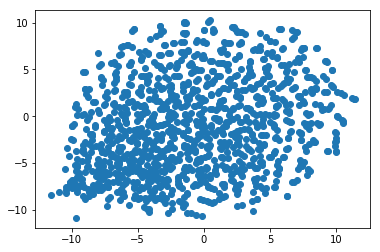

In [25]:
plt.scatter(X[:,0], X[:,1])

In [26]:
from sklearn.metrics import silhouette_score
from spherecluster import SphericalKMeans

In [27]:
cluster_num = 2
skm = SphericalKMeans(n_clusters=cluster_num)
skm.fit(np.array(docvecs))
clusters = skm.predict(docvecs)

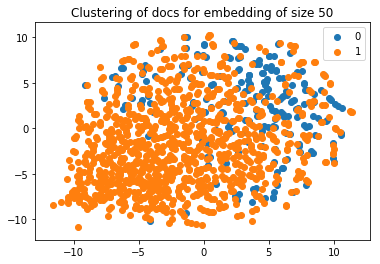

In [29]:
for i in np.unique(clusters):
    points = X[clusters == i]
    plt.scatter(points[:,0], points[:,1], label=i)
plt.title("Clustering of docs for embedding of size 50")
plt.legend()

In [30]:
silhouette_score(docvecs, clusters, metric="cosine")

0.12304156

[['Purchasing document, ZNB, HIMPEHEN, WAI',
  'Document management - PO, ZNB, VLIEBEDI, WAI',
  'Document management - PO, ZNB, VLIEBEDI, WAI',
  'Document management - PO, ZNB, VLIEBEDI, WAI',
  'Delivery (in scope), WE, VLIEBEDI, Purchase group from 3000'],
 ['Purchasing document, ZNB, VNESTEGE, N10',
  'Document management - PO approval - status, Not set, VNESTEGE, N10',
  'Document management - PO approval - indicator, Not set, VNESTEGE, N10',
  'Delivery (in scope), WE, CPIC_CET, Purchase group from 3000',
  'Billing (in scope), RE, WF-BATCH, Purchase group from 3000',
  'Payment (in scope), KZ, VCRUYSMA, N10'],
 ['Purchasing document, ZNB, CEYSSEOL, N10',
  'Document management - PO approval - status, Not set, VNESTEGE, N10',
  'Document management - PO approval - indicator, Not set, VNESTEGE, N10',
  'Delivery (in scope), WE, VLIEBEDI, Purchase group from 3000',
  'Billing (in scope), RE, WF-BATCH, Purchase group from 3000',
  'Delivery (in scope), WE, VDGHINBI, Purchase group 

In [57]:
def get_log_numpy(data, features):
    case_ids = np.unique(data["CASE"])
    
    for case_id in case_ids:
        case = np.array(data[data["CASE"] == case_id][features[1:]])
        log.append(case)
    return log

In [58]:
log = np.array(get_log_no_str(data, features))

In [64]:
log[0][0]

array(['Purchase order', 'Purchasing document', 'ZNB', 'HIMPEHEN', 'WAI'],
      dtype=object)

In [59]:
cluster0 = log[clusters == 0]
cluster1 = log[clusters == 1]

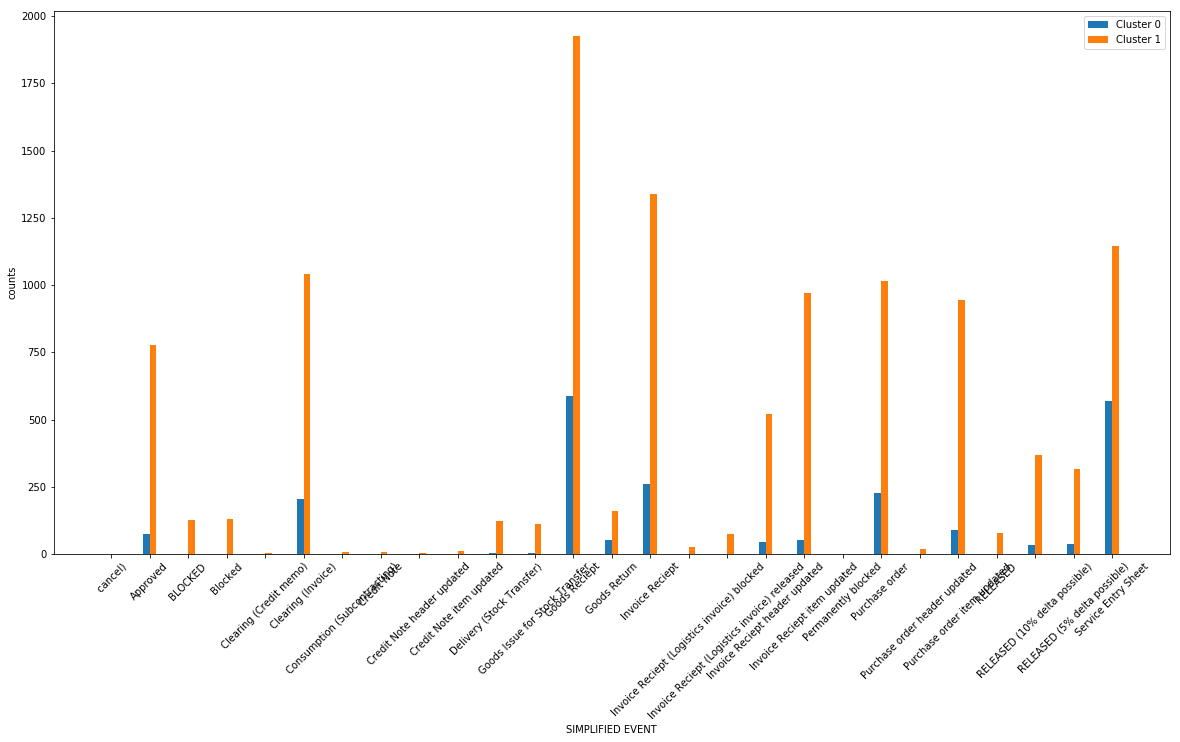

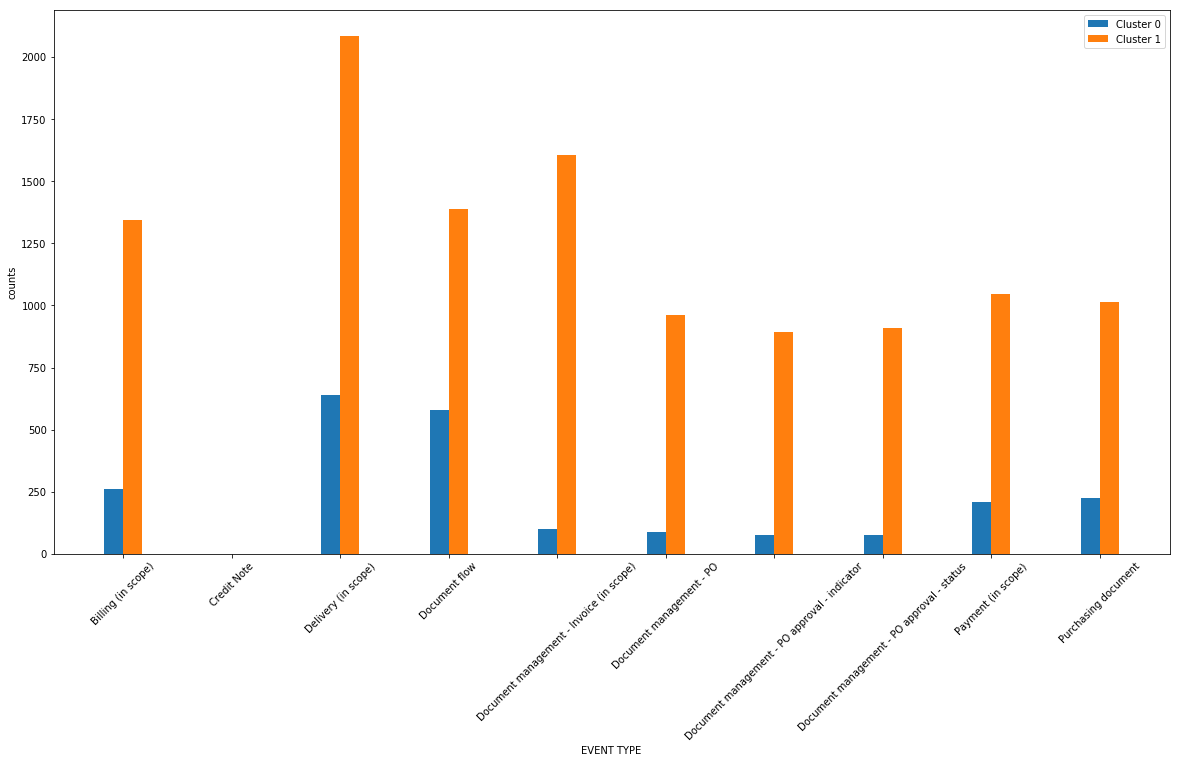

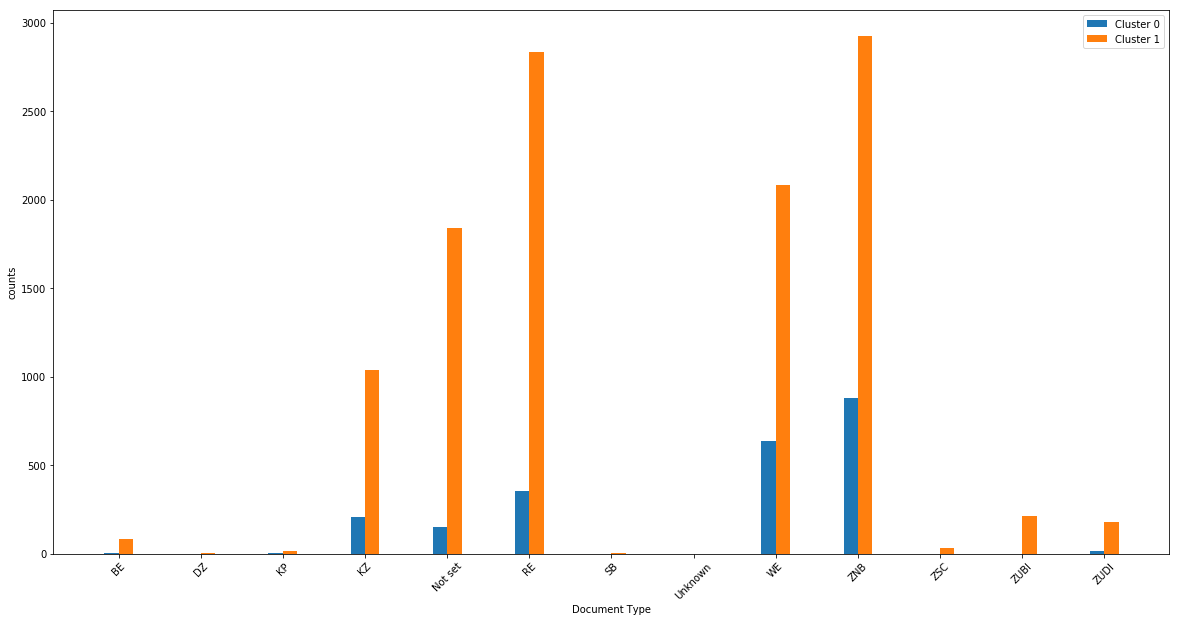

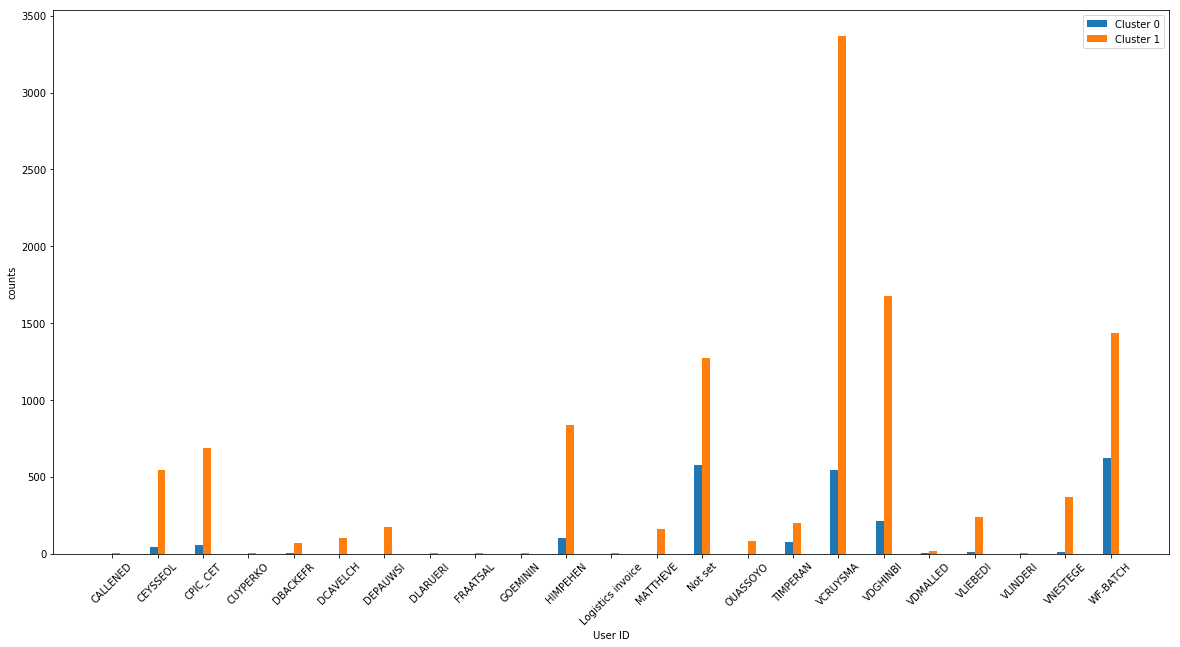

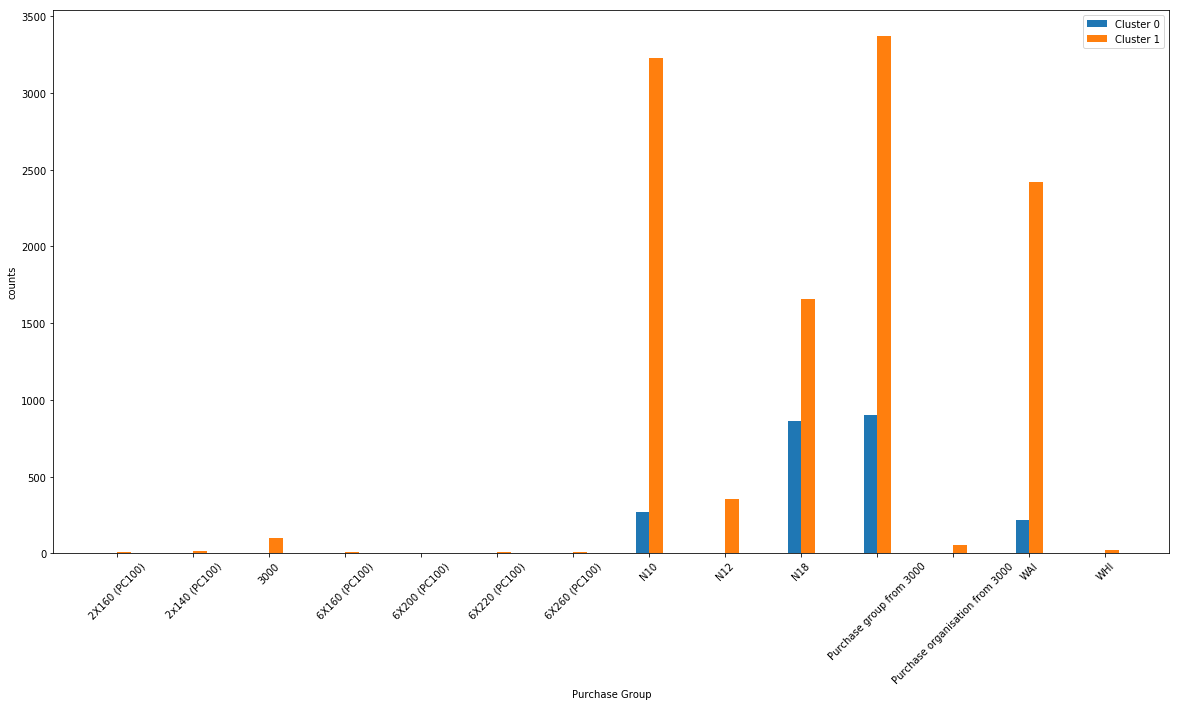

In [66]:
for i, feature in enumerate(features[1:]):
    cluster0_feature = [event[i] for case in cluster0 for event in case]
    counts0 = Counter(cluster0_feature)
    cluster1_feature = [event[i] for case in cluster1 for event in case]
    counts1 = Counter(cluster1_feature)
    
    keys = set(list(counts0.keys()) + list(counts1.keys()))
    counts = {} 
    for key in keys:
        counts[key] = [counts0.get(key, 0), counts1.get(key, 0)]
    clusters_counts = pd.DataFrame(counts, index=["cluster0", "cluster1"])
    fig, ax = plt.subplots(figsize=(20, 10))
    width = 0.35  # the width of the bars

    ind = np.arange(1, 2*(clusters_counts.shape[1]), 2)
    ax.bar(ind - width/2 , list(clusters_counts.loc["cluster0"]), width=width, label="Cluster 0")
    ax.bar(ind + width/2, list(clusters_counts.loc["cluster1"]), width=width, label="Cluster 1")
    ax.set_xlabel(feature)
    ax.set_ylabel("counts")
    ax.set_xticks(ind)
    ax.legend()
    ax.set_xticklabels(labels=list(clusters_counts.columns), rotation=45)
    plt.show()
    